In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import pandas as pd

In [2]:
lena=cv2.imread('lena.bmp')

In [3]:
img=np.array(lena)

In [4]:
default_kernel=np.zeros((5,5), dtype=np.int)
octogona_kernel=default_kernel
for i in [0,4]:
    for j in range(1,4):
        octogona_kernel[i,j]=1
for i in [1,2,3]:
    for  j in range(5):
        octogona_kernel[i,j]=1

## Dilation for grey level image

In [12]:
def dilation(image,kernel):
    L_len=image.shape[0]
    P_len=image.shape[1]
    new_img=np.zeros((L_len,P_len), dtype=np.int)
    ker_l=int((kernel.shape[0]-1)/2)
    ker_p=int((kernel.shape[1]-1)/2)
    
    for l in range(L_len):
        for p in range(P_len):
            
            if(l-ker_l<0):    
                l_start=0
            else:
                l_start=l-ker_l

            if(l+ker_l>L_len-1):    
                l_end=L_len-1
            else:
                l_end=l+ker_l

            if(p-ker_p<0):    
                p_start=0
            else:
                p_start=p-ker_p

            if(p+ker_p>P_len-1):    
                p_end=P_len-1
            else:
                p_end=p+ker_p
            max=0
            for i in range(l_start,l_end+1):
                for j in range(p_start,p_end+1):
                    if(image[i,j,0]*kernel[i-l+ker_l,j-p+ker_p]>max):
                        max=image[i,j,0]*kernel[i-l+ker_l,j-p+ker_p]
            new_img[l,p]=max
                
    re_img=np.stack((new_img, new_img, new_img), axis = -1) 
                        
    return re_img

In [13]:
dilation_img=dilation(img,octogona_kernel)

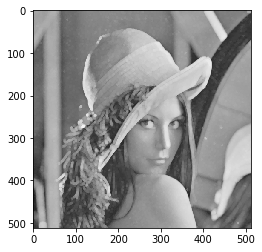

In [15]:
plt.imshow(dilation_img)

In [16]:
cv2.imwrite('dilation.bmp', dilation_img)

True

## Erosion for grey level image

In [19]:
def erosion(image,kernel):
    L_len=image.shape[0]
    P_len=image.shape[1]
    new_img=np.copy(image[:,:,0])
    ker_l=int((kernel.shape[0]-1)/2)
    ker_p=int((kernel.shape[1]-1)/2)
    
    # for the marginal pixels, they should be 0
    for l in [0,1,L_len-2,L_len-1]:
        for p in range(P_len):
            new_img[l,p]=0
    for p in [0,1,P_len-2,P_len-1]:
        for l in range(L_len):
            new_img[l,p]=0
    
    for l in range(ker_l,L_len-ker_l):
        for p in range(ker_p,P_len-ker_p):
            
            l_start=l-ker_l
            l_end=l+ker_l
            p_start=p-ker_p
            p_end=p+ker_p
            
            min=256
            for i in range(l_start,l_end+1):
                for j in range(p_start,p_end+1):
                    if(kernel[i-l+ker_l,j-p+ker_p]==1):
                        if(image[i,j,0]<min):
                            min=image[i,j,0]
            new_img[l,p]=min

    re_img=np.stack((new_img, new_img, new_img), axis = -1) 
                        
    return re_img

In [20]:
erosion_img=erosion(img,octogona_kernel)

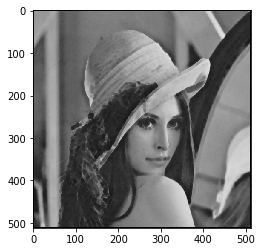

In [21]:
plt.imshow(erosion_img)

In [22]:
cv2.imwrite('erosion.bmp', erosion_img)

True

## Opening

$$
(B \ominus K) \oplus K 
$$

In [30]:
erosion_opening=erosion(img,octogona_kernel)

In [31]:
opening_img=dilation(erosion_opening,octogona_kernel)

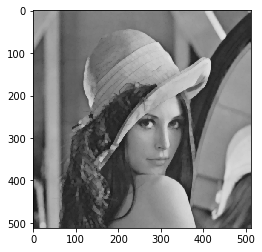

In [32]:
plt.imshow(opening_img)

In [33]:
cv2.imwrite('opening.bmp', opening_img)

True

## Closing

$$
(B \oplus K) \ominus K 
$$

In [26]:
dilation_closing=dilation(img,octogona_kernel)

In [27]:
closing_img=erosion(dilation_closing,octogona_kernel)

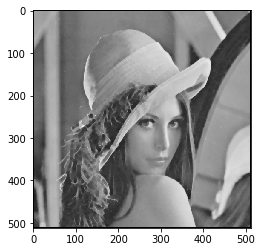

In [28]:
plt.imshow(closing_img)

In [29]:
cv2.imwrite('closing.bmp', closing_img)

True